SVR MSE: 0.0513
Random Forest MSE: 0.1202
Gradient Boosting MSE: 0.1584


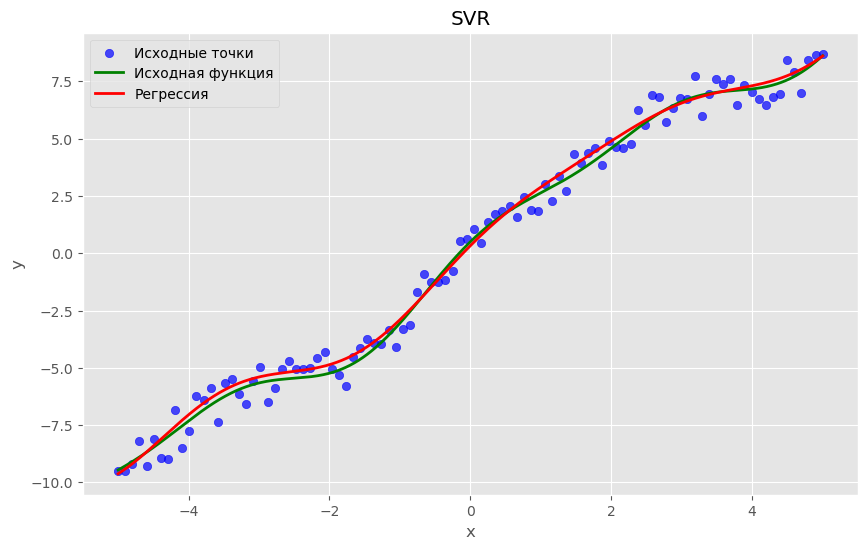

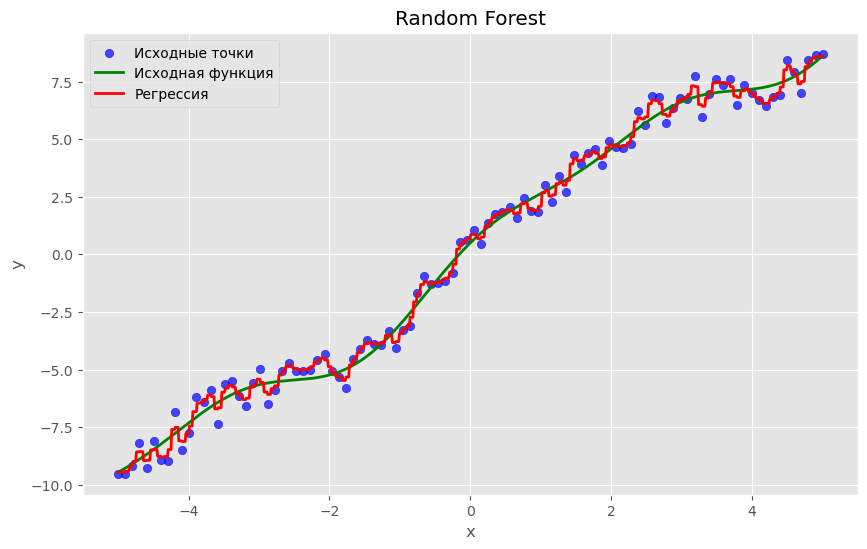

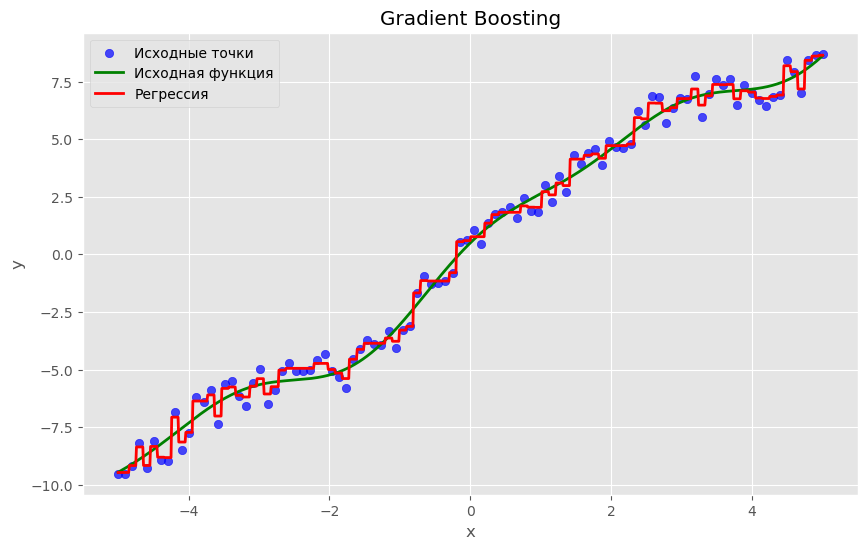

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def f(x):
    return 2 * x + np.sin(x) + 0.5 * np.cos(2*x)

is_linear = False  

x_min, x_max = -5, 5
n_samples = 100

x = np.linspace(x_min, x_max, n_samples).reshape(-1, 1)

noise = np.random.uniform(-1, 1, size=n_samples)

y_true = f(x).flatten()
y_noisy = y_true + noise

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "SVR": SVR(kernel='rbf', C=100, gamma='scale', epsilon=.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)}

trained_models = {}

for name, model in models.items():
    model.fit(x, y_noisy)
    y_pred = model.predict(x)
    mse = mean_squared_error(y_true, y_pred)
    trained_models[name] = (model, mse)
    print(f"{name} MSE: {mse:.4f}")

def plot_regression(name, model, x, y_true, y_noisy):
    x_plot = np.linspace(x_min, x_max, 1000).reshape(-1, 1)
    y_pred = model.predict(x_plot)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y_noisy, color='blue', label='Исходные точки', alpha=0.7)
    plt.plot(x_plot, f(x_plot), 'g-', lw=2, label='Исходная функция')
    plt.plot(x_plot, y_pred, 'r-', lw=2, label='Регрессия')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'{name}')
    plt.legend()
    plt.grid(True)
    plt.show()

for name, (model, _) in trained_models.items():
    plot_regression(name, model, x, y_true, y_noisy)